In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/01_Bild.JPG)

In [50]:
houseprice = pd.read_csv('https://raw.githubusercontent.com/xpython21/Colab/main/Data/MAzure_pl/house_data.csv')
houseprice.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15940,8133300050,20140626T000000,200500.0,3,1.75,1260,9346,1.0,0,0,4,7,1260.0,0,1963,0,98030,47.3713,-122.186,1800,9705
3848,2322069168,20140507T000000,630000.0,3,2.50,2680,327135,2.0,0,0,3,8,2680.0,0,1995,0,98010,47.3783,-122.003,2020,60080
14052,7397300220,20140529T000000,2750000.0,4,3.25,4430,21000,2.0,0,0,3,10,4430.0,0,1952,2007,98039,47.6398,-122.237,3930,20000
516,1922059046,20141029T000000,308000.0,3,1.00,1980,39150,1.5,0,0,3,6,1580.0,400,1932,0,98030,47.3818,-122.225,1860,11811
13346,1822350180,20141211T000000,375000.0,3,2.25,1330,8004,2.0,0,0,3,7,1330.0,0,1985,0,98034,47.7098,-122.217,1300,7971
21578,567000385,20140623T000000,362500.0,2,1.50,940,1768,2.0,0,0,3,7,940.0,0,2009,0,98144,47.5925,-122.295,1130,1159
7627,4083800555,20150326T000000,550000.0,2,1.00,980,3080,1.5,0,0,3,7,980.0,0,1910,1946,98103,47.6646,-122.339,1450,3333
13703,1604601855,20150213T000000,360500.0,3,1.00,970,6180,1.0,0,3,3,6,970.0,0,1974,0,98118,47.5658,-122.291,1120,4500
9477,3822200164,20140819T000000,423500.0,3,2.25,1890,7498,1.0,0,0,3,7,1190.0,700,1987,0,98125,47.7300,-122.297,1660,8100
9040,1180007005,20140625T000000,265950.0,3,1.50,1150,8450,1.0,0,0,4,6,1150.0,0,1951,0,98178,47.4927,-122.224,1160,6800


In [51]:
print("Der Datensatz enthält {} Zeilen und {} Spalten".format(houseprice.shape[0], houseprice.shape[1]))

Der Datensatz enthält 21613 Zeilen und 21 Spalten


![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/02_1_Bild.JPG)
![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/02_2_Bild.JPG)

In [52]:
houseprice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/03_Bild.JPG)

In [53]:
houseprice = houseprice.drop(["id", "date", "zipcode", "lat", "long"], axis=1)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/04_1_Bild.JPG)
![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/04_2_Bild.JPG)

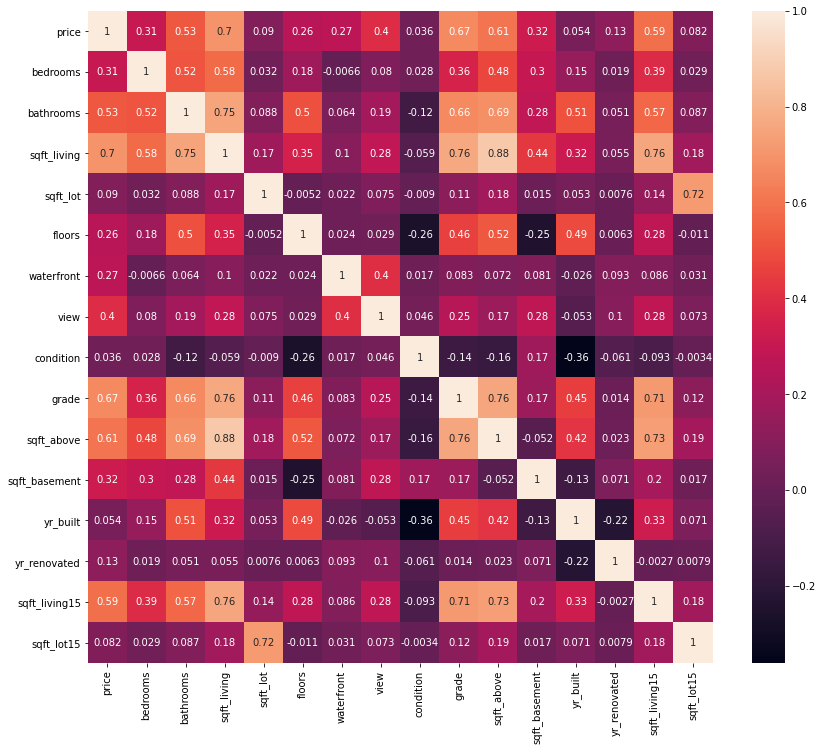

In [54]:
plt.figure(figsize=(14, 12))

linCorrelation = houseprice.corr()
sns.heatmap(linCorrelation, annot=True)
plt.show()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/05_Bild.JPG)

In [55]:
houseprice.loc[houseprice['yr_renovated'] > 1, 'yr_renovated'] = 1

In [56]:
houseprice[['yr_renovated']].head()

,yr_renovated
0,0
1,1
2,0
3,0
4,0


![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/06_Bild.JPG)

In [57]:
houseprice = houseprice.dropna()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/07_Bild.JPG)

In [58]:
houseprice.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [59]:
col_names = ["waterfront", "view", "yr_renovated"]

for col in col_names:
  houseprice[col] = houseprice[col].astype("category", copy=False)

In [60]:
houseprice.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/08_Bild.JPG)

In [68]:
houseprice['yr_renovated'] = pd.get_dummies(houseprice['yr_renovated'])

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/09_Bild.JPG)


In MAMLS the label is defined at the "Train Model" module

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/10_Bild.JPG)

In [69]:
y = houseprice['price']
X = houseprice.drop('price', axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
X_train.shape, y_train.shape

((17288, 15), (17288,))

In [77]:
X_test.shape, y_test.shape

((4323, 15), (4323,))

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/11_Bild.JPG)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/10_Bild.JPG)

In [78]:
linreg = LinearRegression()

In [79]:
reg = linreg.fit(X_train, y_train)

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_Bild.JPG)

In [91]:
y_pred = reg.predict(X_test).round()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_1l_Bild.JPG)![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/13_2l_Bild.JPG)

In [93]:
price_comparison = pd.DataFrame(
    {
      'actualPrice': y_test,
      'predictedPrice': y_pred
    }
)

price_comparison.head(10)

,actualPrice,predictedPrice
17162,231000.0,360197.0
3005,228800.0,222831.0
21333,1999950.0,1533291.0
11406,387500.0,730192.0
2874,499000.0,548860.0
16018,580000.0,412593.0
12079,216300.0,478443.0
9080,363000.0,433256.0
7850,508000.0,610952.0
15785,635000.0,510486.0


In [108]:
price_comparison['delta'] = price_comparison['predictedPrice'] - price_comparison['actualPrice']

In [117]:
price_comparison.reset_index(drop=True, inplace=True)
price_comparison['delta'].head(10)

0    129197.0
1     -5969.0
2   -466659.0
3    342692.0
4     49860.0
5   -167407.0
6    262143.0
7     70256.0
8    102952.0
9   -124514.0
Name: delta, dtype: float64

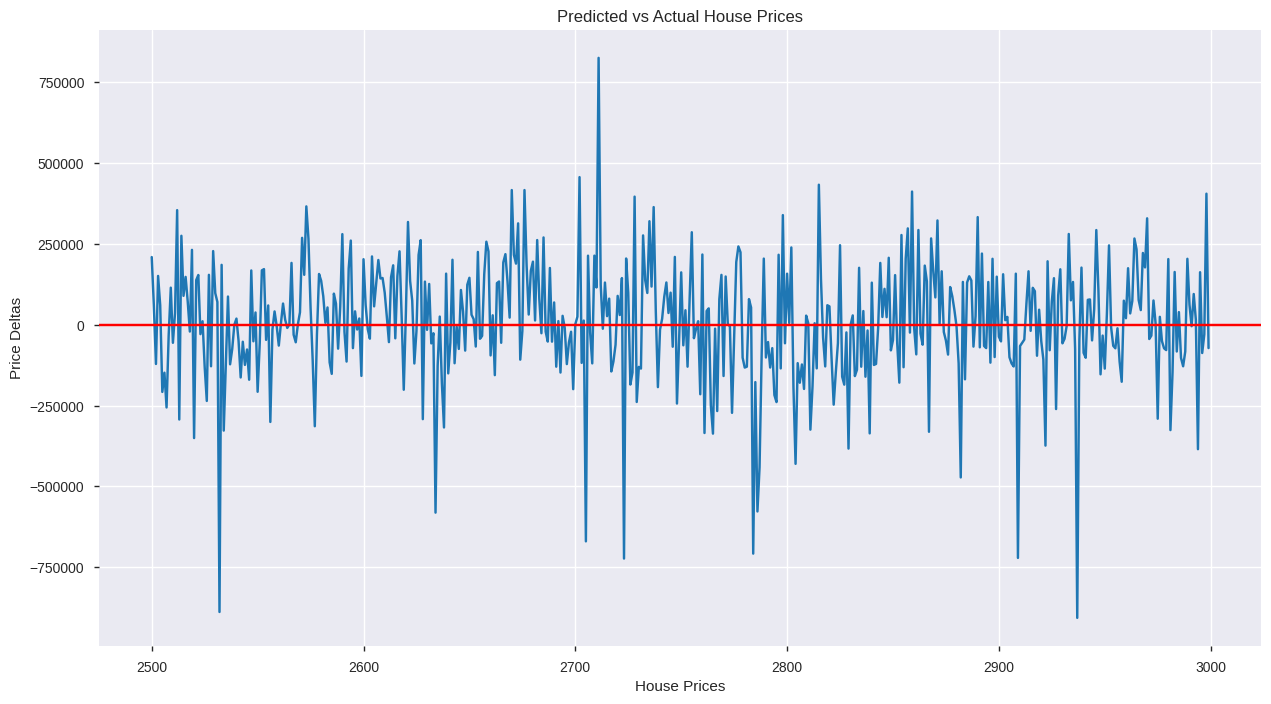

In [126]:
plt.figure(figsize=(15, 8))

plt.plot(price_comparison['delta'][2500:3000])
plt.axhline(y=0, color='r')

plt.xlabel('House Prices')
plt.ylabel('Price Deltas')

plt.title('Predicted vs Actual House Prices')

plt.show()

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/14_Bild.JPG)

In [127]:
reg.score(X_test, y_test)

0.6551560528254095

![](https://raw.githubusercontent.com/xpython21/Colab/main/Images/15_Bild.JPG)